# __Image Classification with CIFAR10__

Build a neural network-based classification model to recognize characters using the following metrics:

- Use four convolution layers with a 3X3 kernel and activation function as ReLU.
- Add maximum pooling layers after every other convolution layer and two hidden layers with dropout.


## Steps to be followed:

1. Load and normalize the CIFAR10 training and test datasets using torchvision <br>
2. Define a convolutional neural network <br>
3. Define a loss function <br>
4. Train the network on the training data <br>
5. Test the network on the test data <br>

### Step 1: Load and normalize the CIFAR10 training and test datasets using torchvision
- Import the NumPy package.
- Import the Python package Matplotlib, which sets the padding between and around the subplots as well as the figure size.
- Import the Torch package, which gives us access to some helpful neural types.
- Use **torchvision**, as it makes it easy to load CIFAR10.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms


Evaluating the Data
- The output of **torchvision** datasets consists of PILImage images with pixel values ranging from 0 to 1.

- To prepare the data for training, transform the PILImage images into Tensors and normalize their values to a range of -1 to 1.

- It's important to inspect the data in array form to gain a better understanding of its structure and characteristics.

- Plotting the classes helps visualize the distribution and frequency of different classes in the dataset.


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:02<00:00, 62942552.59it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


**Observation:**

- The CIFAR10 file has been downloaded.

Displaying an Image
- Import the necessary libraries, including **matplotlib.pyplot** and **numpy**, for visualizing images.
- The **imshow()** function is defined to display an image. It normalizes the pixel values, converts the image to a NumPy array, and uses **plt.imshow()** to show the image.
The **dataiter** object is created from the **trainloader** iterator, allowing us to retrieve a batch of images and labels from the dataset.
- The first batch of images and their corresponding labels are retrieved using **next (dataiter)**. The **make_grid()** function from **torchvision.utils** is used to create a grid of images, which is then passed to **imshow()** to display the grid of images. The labels of the images are printed using a list comprehension.

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


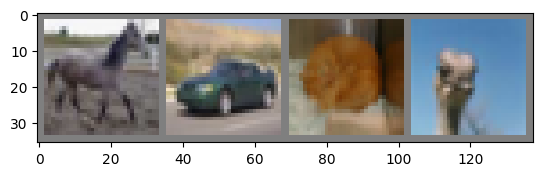

horse   car   cat  bird


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()



dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

**Observations:**



- The output will show an image containing four different objects: two planes, a bird, and a dog.
- The **imshow()** function is used to display the image grid, and the labels **plane**, **plane**, **bird**, and **dog** are printed below the image.
- This code is useful for visualizing a batch of images and their corresponding labels from a dataset.

### Step 2: Define the convolutional neural network
A neural network model called **Net** is defined using the PyTorch **nn.Module** class. The model incorporates multiple layers, such as convolutional layers, pooling layers, and fully connected layers. Below is a breakdown of the code:

- The **Net** class is defined as a subclass of **nn.Module**.
- The constructor **__init__** initializes the layers of the network, including two convolutional layers, **conv1** and **conv2**, two fully connected layers, **fc1** and **fc2**, and an output layer, **fc3**.
- The **forward** method defines the forward pass of the network. It applies convolutional and pooling operations to the input **x**, reshapes it, and passes it through fully connected layers with ReLU activation functions.
- An instance of the **Net** class is created and assigned to the variable **net**. This instance represents our neural network model.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### Step 3: Define a loss function
- The **nn.CrossEntropyLoss()** function is used to define the criterion or loss function for the neural network. It computes the cross-entropy loss, which is commonly used for multi-class classification tasks.
- The **optim.SGD()** function is used to define the optimizer for the neural network. It implements the stochastic gradient descent (SGD) optimization algorithm. The optimizer takes the parameters of the network **net.parameters()** and specifies the learning rate **lr = 0.001** and momentum **momentum = 0.9** values for the optimization process.
- These components are essential for training the neural network.

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Step 4: Train the network on the training data
- The outer loop **for epoch in range(2):** It iterates over a specified number of epochs, which determines how many times the entire training dataset will be passed through the network.
- The **running_loss** variable is initialized to keep track of the cumulative loss during each epoch.
- The inner loop **for i, data in enumerate(trainloader, 0)** iterates over the batches of data in the **trainloader**, which contains the training dataset divided into batches.
- Within each iteration, the **optimizer.zero_grad()** function is called to clear the gradients of the network parameters.
- The inputs are passed through the network using **outputs = net(inputs)**, and the predicted outputs are obtained.
- The loss between the predicted outputs and the ground truth labels is computed using **loss = criterion(outputs, labels)**, where **criterion** is the cross-entropy loss function defined earlier.
- The **loss.backward()** function computes the gradients of the loss with respect to the network parameters.
- The **optimizer.step()** function updates the network parameters based on the computed gradients, using the specified optimization algorithm (SGD, in this case).
- The **running_loss** is updated by adding the current batch loss.
- The average loss over the previous 2000 batches is printed using **print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))**.





In [ ]:
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.135
[1,  4000] loss: 1.792
[1,  6000] loss: 1.631
[1,  8000] loss: 1.549
[1, 10000] loss: 1.486
[1, 12000] loss: 1.451
[2,  2000] loss: 1.391
[2,  4000] loss: 1.353
[2,  6000] loss: 1.343
[2,  8000] loss: 1.308
[2, 10000] loss: 1.306
[2, 12000] loss: 1.299
Finished Training


**Observation:**
- The statistics are printed for the running loss.

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### Step 5: Test the network on the test data
- We have trained the network for two passes over the training dataset. But we need to check if the network has learned anything at all.


- We will check this by predicting the class label that the neural network outputs and checking it against the **GroundTruth**. If the prediction is correct, we add the sample to the list of correct predictions.




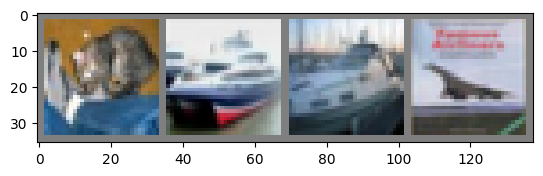

GroundTruth:    cat  ship  ship plane


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))



**Observation:**
 - Image is displayed from the test set of **GroundTruth**, which consists of **cat**, **ship**, **ship,**  and **plane**.

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Predicting the neural network:
- The outputs are energies for the ten classes. The higher the energy for a class, the more the network thinks that the image is of that particular class.

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


**Observation:**


- The predictions of the neural network are **cat**, **plane**, **car**, and **plane**.

Performing network on the whole dataset:
- It initializes the variables **correct** and **total** to keep track of the number of correct predictions and the total number of images, respectively
- Then, it enters a loop over the test dataset and performs the following steps for each batch of images:
  - Passes the batch of images through the network to obtain the outputs
  - Uses the **torch.max** function to get the predicted labels by selecting the class with the highest output score
  - Updates the **total** variable by adding the number of images in the current batch
  - Updates the **correct** variable by adding the number of correct predictions in the current batch
- Finally, it computes the accuracy by dividing the **correct** count by the **total** count, multiplying it by 100 to convert it to a percentage, and printing the result

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


**Observation:**
- The accuracy of the network on the whole dataset is 54%.

Perform Classes on Individual Datasets
- Classes iterate over the test dataset and compare the predicted labels with the ground truth labels to determine the number of correct predictions for each class.
- They keep track of the total number of instances for each class and calculate the accuracy by dividing the number of correct predictions by the total number of instances for each class.

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 44 %
Accuracy of   car : 50 %
Accuracy of  bird : 33 %
Accuracy of   cat : 32 %
Accuracy of  deer : 59 %
Accuracy of   dog : 56 %
Accuracy of  frog : 55 %
Accuracy of horse : 70 %
Accuracy of  ship : 75 %
Accuracy of truck : 63 %


**Observations:**

- The model performs relatively well in predicting classes like truck (76%), dog (70%), and plane (64%).
- The model struggles more with classes like bird (32%), cat (33%), and frog (51%), where the accuracy is relatively lower.
- Some classes, such as car (46%), horse (51%), and deer (58%), show moderate accuracy.